In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from datetime import timedelta
import pmdarima as pm
from pmdarima.arima import auto_arima
%matplotlib inline

In [16]:
global location
location = "Town Hall (West)"
def new_read(csv,total_hrs=None):
    df = pd.read_csv(csv)
    df = df[["Date","Hour",location]]
    df[location] = pd.to_numeric(df[location],errors="coerce")
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
    df['Date'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Hour'], unit='h')
    df = df[["Date",location]]
    df.set_index("Date", drop=True, inplace=True)
    if total_hrs:
        df = df[:total_hrs]
    return df

In [17]:
files = os.path.join("..\\dataset\\yearly\\", "ds*.csv")
files = glob.glob(files)
df = pd.concat(map(new_read, files))
df

,Town Hall (West)
Date,
2021-03-01 00:00:00,60.0
2021-03-01 01:00:00,59.0
2021-03-01 02:00:00,23.0
2021-03-01 03:00:00,12.0
2021-03-01 04:00:00,28.0
...,...
2021-11-30 19:00:00,1228.0
2021-11-30 20:00:00,1223.0
2021-11-30 21:00:00,1331.0


In [18]:
df = df.dropna()
df

,Town Hall (West)
Date,
2021-03-01 00:00:00,60.0
2021-03-01 01:00:00,59.0
2021-03-01 02:00:00,23.0
2021-03-01 03:00:00,12.0
2021-03-01 04:00:00,28.0
...,...
2021-11-30 19:00:00,1228.0
2021-11-30 20:00:00,1223.0
2021-11-30 21:00:00,1331.0


In [19]:
df=df.groupby(pd.Grouper(freq='D')).sum()
df

,Town Hall (West)
Date,
2021-03-01,15891.0
2021-03-02,16615.0
2021-03-03,18456.0
2021-03-04,19170.0
2021-03-05,23838.0
...,...
2022-03-27,26395.0
2022-03-28,22602.0
2022-03-29,23542.0


In [20]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.3190918727796173, True)

<AxesSubplot:xlabel='Date'>

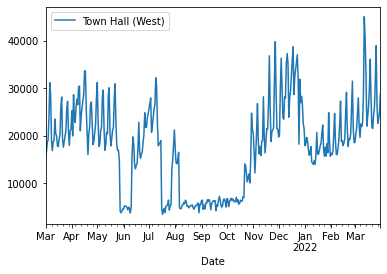

In [21]:
df.plot(kind = 'line')

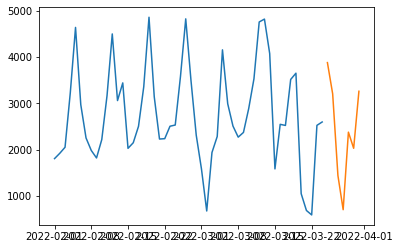

In [8]:
train = df[:-7]
test = df[-7:]
plt.plot(train)
plt.plot(test)

In [9]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,max_p=5, max_d=5, max_q=5, start_P=0,D=1, start_Q=0, max_P=5, max_D=5,max_Q=5,m=12,seasonal=True,error_action='warn',trace=True,supress_warnings=True, stepwise=True, random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=685.069, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=682.391, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=686.871, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=678.773, Time=0.39 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=678.784, Time=0.85 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=680.538, Time=1.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=676.793, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=680.719, Time=0.10 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=609702072618.529, Time=1.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=6

In [10]:
prediction = pd.DataFrame(arima_model.predict(n_periods=7),index=test.index)
prediction.columns = ['predicted_count']
prediction["actual_count"] = test[location]
prediction

,predicted_count,actual_count
Date,,
2022-03-25,2723.744902,3882.0
2022-03-26,2808.110093,3206.0
2022-03-27,2864.205639,1441.0
2022-03-28,2334.949074,701.0
2022-03-29,2057.553405,2378.0
2022-03-30,2281.121121,2029.0
2022-03-31,2416.192959,3262.0


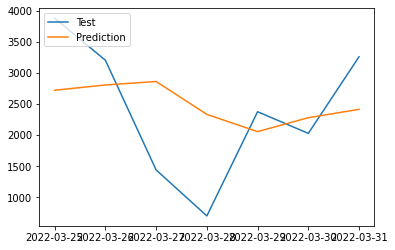

In [11]:
plt.plot(prediction["actual_count"], label='Test')
plt.plot(prediction["predicted_count"], label='Prediction')
plt.legend(loc ='upper left')
plt.show()